# Homework5 sensor fusion¶
Student Vezeteu Eugeniu - 886240

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cost_function(x):
    return (1.1-np.sin(x))**2

def derivative_cost_function(x): # function derivative
    return  -2.2*np.cos(x) + 2.*np.sin(x)*np.cos(x)

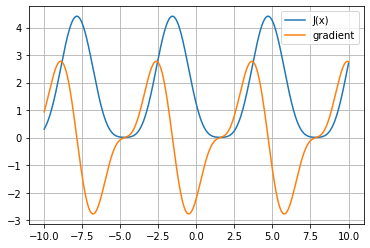

In [3]:
xx = np.linspace(-10,10,1000)
cost = [cost_function(i) for i in xx]
grad = [derivative_cost_function(i) for i in xx]

plt.plot(xx,cost,label='J(x)')
plt.plot(xx,grad,label='gradient')
plt.grid()
plt.legend()
plt.show()

### 1D case


In [4]:
max_iter = 100
precision = .01
Ng=10

sigma = 1# we use the same standard deviation for all measurement
dimension = 1 #1D
I = np.eye(dimension)
R = sigma*sigma*I # measurement variance
R_inv = I/(sigma*sigma) #cache the inverse
E = sigma*I #we will use this below
E_inv = (1/sigma)*I
R_inv = R_inv[0][0]

In [5]:
#Algorithm 4.3 from Lecture notes pg 44
def Line_Search_on_Grid(prev_x, delta_x, J, Ng):
    gamma_best=1.
    J_best = J(prev_x + gamma_best*delta_x)
    for j in range(Ng+1):
        gamma = float(j/Ng)
        J_prop = J(prev_x + gamma*delta_x)
        #print("gamma:{}, J_prop:{}, J_best:{}".format(gamma,J_prop,J_best))
        if J_prop < J_best:
            gamma_best = gamma
            J_best = J_prop
            
    return gamma_best

print(R_inv)

1.0


In [6]:
def GN_with_Line_Search(x0=1,y=None,g=None,G=None):
    xi, loss_history, cost_history =[],[],[]
    
    x=x0
    xi.append(round(x,3))
    cost = cost_function(x)
    cost_history.append(cost)
    
    i=0
    prev_approximation = 0.0
    while i<max_iter:
        G = derivative_cost_function(x)
        delta_x = (G.T/(G.T*R_inv*G))
        
        gamma_best = Line_Search_on_Grid(x, delta_x, cost_function, Ng)
        #print('gamma_best ',gamma_best)
        
        new_x = x - gamma_best*delta_x
        
        x = new_x
        xi.append(round(x,3))
        current_cost = cost_function(new_x)
        cost_history.append(current_cost)
        
        if abs(G-prev_approximation) < precision:
            print('Early stopping, delta_x {}, break'.format(delta_x))
            break
        prev_approximation = G
        i+=1
        
    print('Local minima x:{},  current_cost:{}, i:{}'.format(x,current_cost,i))
    
    return loss_history, xi, i, cost_history

loss_history, xi, i, cost_history = GN_with_Line_Search(-1.55)

Early stopping, delta_x 10.845617234790888, break
Local minima x:1.8852738008682992,  current_cost:0.022213477151315, i:2


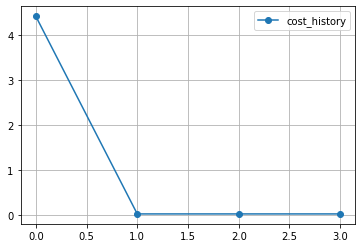

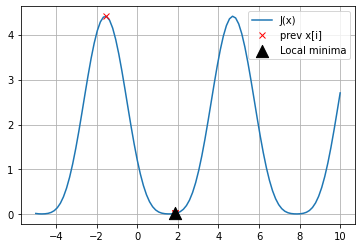

In [7]:
plt.plot(cost_history,'o-', label='cost_history')
plt.legend()
plt.grid()
plt.show()

xx = np.linspace(-5,10,100)
cost = [cost_function(i) for i in xx]

plt.plot(xx,cost,label='J(x)',zorder=5)
plt.plot(xi,cost_function(xi),'rx',zorder=6, label='prev x[i]')
i = np.argmin(cost_function(xi))
plt.scatter(xi[i], cost_function(xi[i]), marker='^', c='k',s=150, label='Local minima',zorder=10)
plt.legend()
plt.grid()
plt.show()


## 2D 

In [12]:


N = 10 # number of observation set
sigma = 1#

X_max = 30
Y_max = 30

x = np.array([0.5*X_max,0.5*Y_max]) #set the true variable
x_0 = np.array([1,1]) # initial guess

iteration_end = 10 #how many iteration

x_history_GN_LS = np.zeros((iteration_end,2)) #the evolution of estimation results recorded here
x_history_GN_LS[0,:] = x_0 # you know this right?


I = np.eye(2)
R = sigma*sigma*I # measurement variance
R_inv = I/(sigma*sigma) #cache the inverse
E = sigma*I 
E_inv = (1/sigma)*I
N_gamma_grid = 10 


def g(x):
    return np.sin(x)

def G(x):
    return np.cos(x)

def J_cost(x):
    e = (1.1-np.sin(x))**2
    return np.sum(e)


In [14]:
r = sigma*np.random.randn(N,2)
print('r ',np.shape(r))
print('g(x) ',np.shape(g(x)))

y = g(x) + r
print('y ',np.shape(y))

Grid_size=100
[x_grid,y_grid] = np.meshgrid(np.arange(Grid_size)*X_max/Grid_size,np.arange(Grid_size)*Y_max/Grid_size)
J = np.zeros((Grid_size,Grid_size))
for i in range(x_grid.shape[0]):
    for j in range(x_grid.shape[1]):
        d = np.array([x_grid[i,j],y_grid[i,j]])
        J[i,j] = J_cost(d)

r  (10, 2)
g(x)  (2,)
y  (10, 2)


In [36]:
#Gauss Netwon with Line Search
gamma_max = 1
gamma = np.arange(0,N_gamma_grid+1)*gamma_max/N_gamma_grid
print('grid for gamma ',gamma)

for j in range(iteration_end-1):
    x_now = x_history_GN_LS[j,:]
    gj = g(x_now)
    Gj = G(x_now)
    tmp1 = (Gj.T*R_inv*Gj)
    tmp2 = Gj.T@R_inv*np.sum(y-gj,axis=0)/N
    Delta_x = np.linalg.solve(tmp1,tmp2)
    
    J_min = J_cost(x_now)
    gamma_min = 0
    for k in range(N_gamma_grid):
        J_prop = J_cost(x_now+gamma[k]*Delta_x)
        if J_prop < J_min:
            J_min = J_prop
            gamma_min = gamma[k]
    print('Gamma_min = {0:.3f}'.format(gamma_min))
    x_history_GN_LS[j+1,:] = x_now + gamma_min * Delta_x
    
    print()

grid for gamma  [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
Gamma_min = 0.900

Gamma_min = 0.300

Gamma_min = 0.000

Gamma_min = 0.000

Gamma_min = 0.000

Gamma_min = 0.000

Gamma_min = 0.000

Gamma_min = 0.000

Gamma_min = 0.000



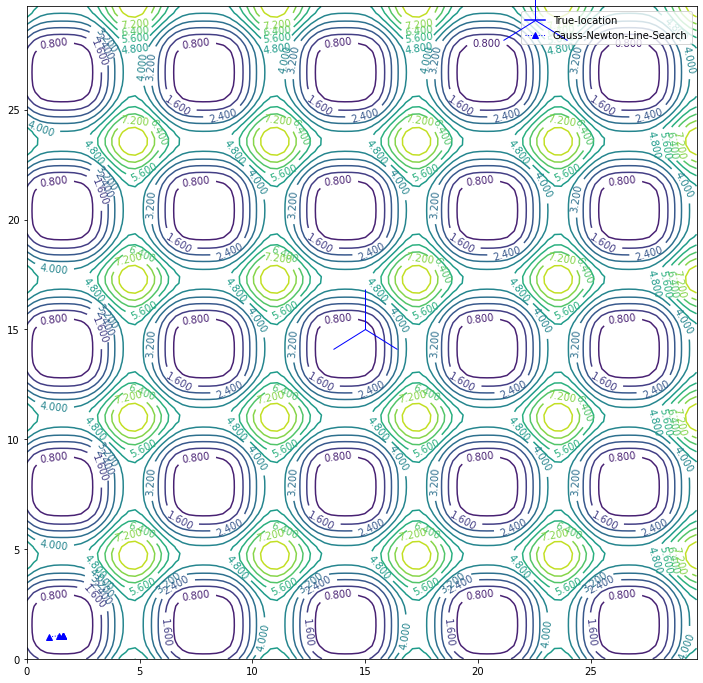

In [44]:
fig = plt.figure(figsize=(12,12))
point_size=6
ax = fig.add_subplot(111)
CS = ax.contour(x_grid,y_grid,J,levels=10)
ax.clabel(CS, inline=1, fontsize=10)
ax.plot(x[0],x[1],c='b',marker="2",markersize=80,label='True-location')
ax.plot(x_history_GN_LS[:,0],x_history_GN_LS[:,1],':b',marker='^',linewidth=1,label='Gauss-Newton-Line-Search')
ax.legend()



Text(0.5, 1.0, 'Squarederror')

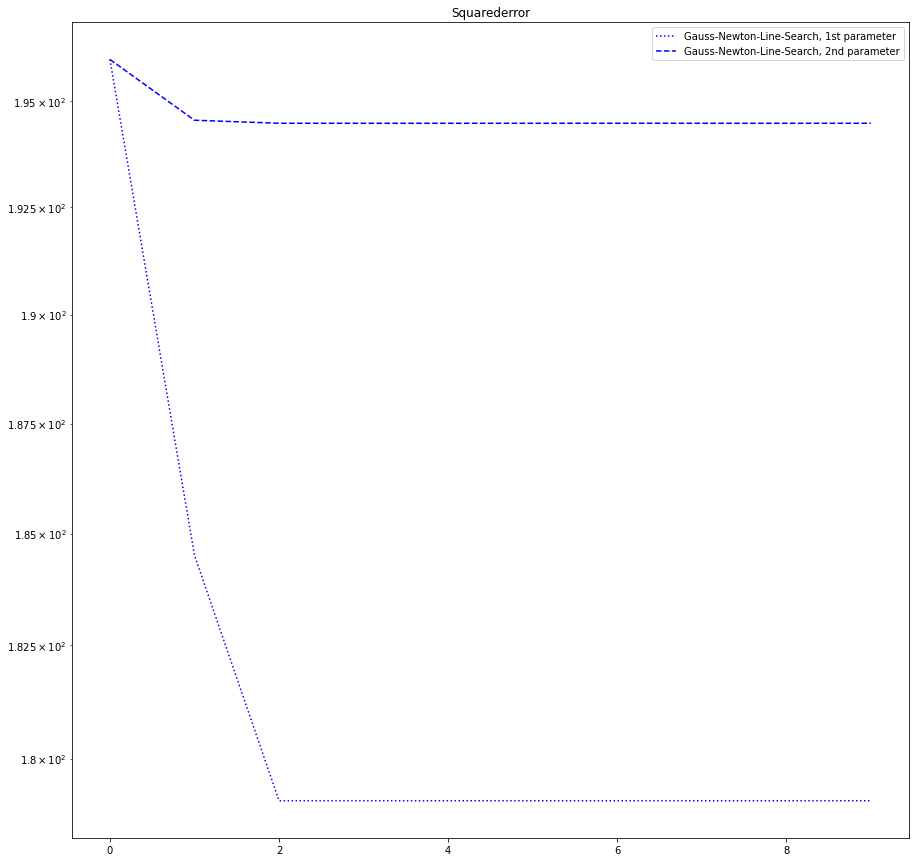

In [45]:
fig = plt.figure(figsize=(15,15))
plt.semilogy(np.square(x_history_GN_LS[:,0]-x[0]),':b',label='Gauss-Newton-Line-Search, 1st parameter')
plt.semilogy(np.square(x_history_GN_LS[:,1]-x[1]),'--b',label='Gauss-Newton-Line-Search, 2nd parameter')
plt.legend()
plt.title('Squarederror')